<a href="https://colab.research.google.com/github/fhthumbar/covid19-analysis/blob/main/COVID_19_DATA_ANALYSIS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

covid_latest_df = pd.read_csv("data/country_wise_latest.csv")
happiness_df = pd.read_csv("data/Happiness dataset.csv")


In [ ]:
import pandas as pd

# Preview the datasets
print(covid_latest_df.head())
print(happiness_df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [ ]:
# Check for missing values and data types
print(covid_latest_df.info())
print(covid_latest_df.isnull().sum())

print(happiness_df.info())
print(happiness_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
# Rename 'Country/Region' to 'Country' in the covid dataset
covid_latest_df.rename(columns={'Country/Region': 'Country'}, inplace=True)

# Now merge the two DataFrames
merged_df = pd.merge(happiness_df, covid_latest_df, on='Country', how='inner')

# Print the shape and first few rows of the merged DataFrame
print(merged_df.shape)
print(merged_df.head())


(145, 23)
   Overall rank      Country  Score  GDP per capita  Social support  \
0             1      Finland  7.769           1.340           1.587   
1             2      Denmark  7.600           1.383           1.573   
2             3       Norway  7.554           1.488           1.582   
3             4      Iceland  7.494           1.380           1.624   
4             5  Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  Confirmed  ...  New cases  New deaths  \
0                      0.393       7398  ...          5    

In [ ]:
%pip install seaborn



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


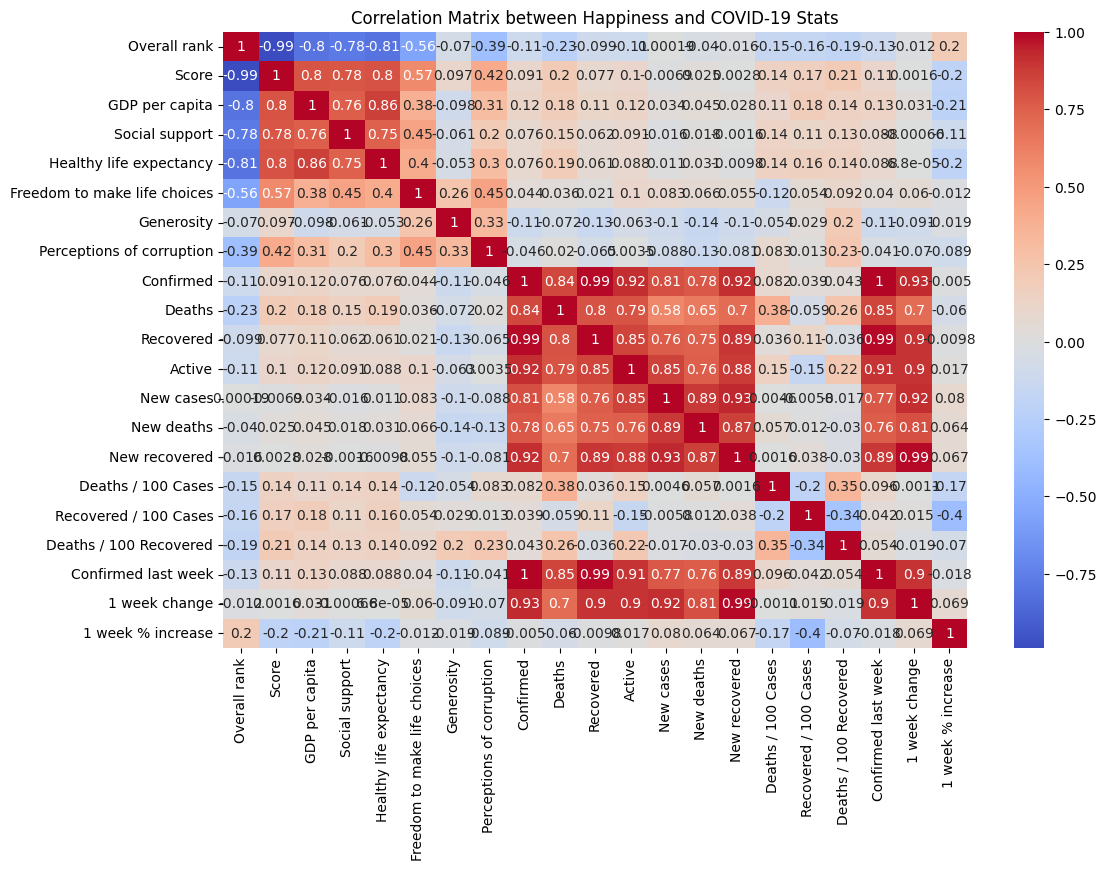

In [ ]:
# Select only numeric columns for correlation
numeric_df = merged_df.select_dtypes(include=['number'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Happiness and COVID-19 Stats')
plt.show()
